In [1]:
from IPython.display import display_markdown

In [2]:
display_markdown("""# 63GIIN - Aprendizaje Automático - UC2
# Gagliardo Miguel Angel
# 26 de Diciembre de 2024""", raw=True)

# 63GIIN - Aprendizaje Automático - UC2
# Gagliardo Miguel Angel
# 26 de Diciembre de 2024

In [3]:
# Importamos las librerias necesarias
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Traemos los imports necesarios de sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
display_markdown("""### En este caso he usado 3 algoritmos diferentes, mencionados en la UC1
1. Random Forest
1. K-Vecinos Más Cercanos (También KNeighbors o KNN)
1. Regresion Logistica
""", raw=True)

### En este caso he usado 3 algoritmos diferentes, mencionados en la UC1
1. Random Forest
1. K-Vecinos Más Cercanos (También KNeighbors o KNN)
1. Regresion Logistica


In [6]:
# Cargamos el CSV con pandas
data = pd.read_csv("./Infarto.csv")
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
display_markdown("## Informacion del Dataset", raw=True)

## Informacion del Dataset

In [8]:
display_markdown("#### Cuantas filas y columnas tiene la tabla", raw=True)
data.shape

#### Cuantas filas y columnas tiene la tabla

(303, 14)

In [9]:
display_markdown("#### Info provista por pandas. Cantidad de entradas, type", raw=True)
data.info()

#### Info provista por pandas. Cantidad de entradas, type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


output
1    165
0    138
Name: count, dtype: int64

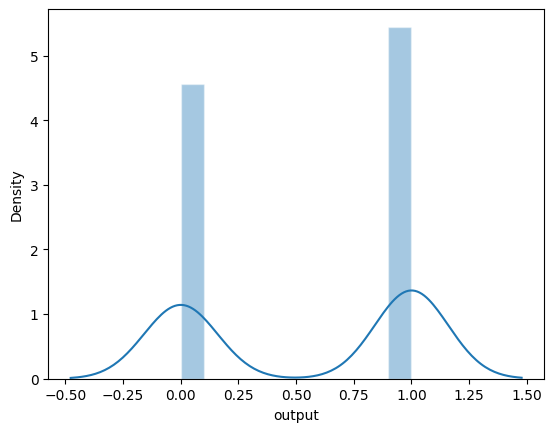

In [10]:
sns.histplot(
    data["output"],
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, .4),
)
data["output"].value_counts()

In [11]:
display_markdown("#### Buscamos los datos que tienen valores nulos o 'vacios'", raw=True)
data.isnull().sum()

#### Buscamos los datos que tienen valores nulos o 'vacios'

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
# Se ve aún mejor utilizando Pandas
null = data.isnull()
null

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

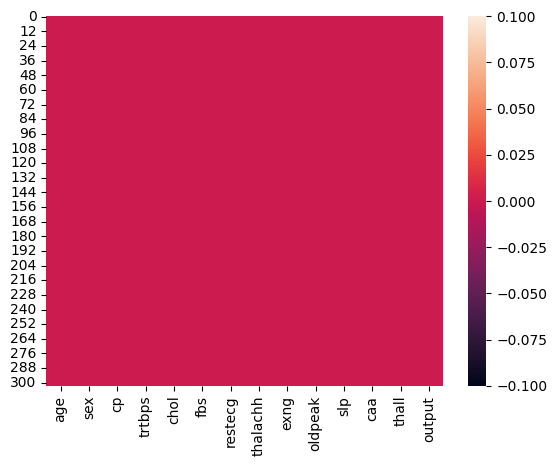

In [13]:
# Vemos claramente que no hay valores nulos en el dataset. Si en alguna de estas celdas hubiese un `True` en vez de `False`,
# indicaría la presencia de valores nulos

# Seaborn tiene una funcionalidad `heatmap` que muestra esto aún mejor
sns.heatmap(null)

Text(0.5, 1.0, 'Muestreo de edades')

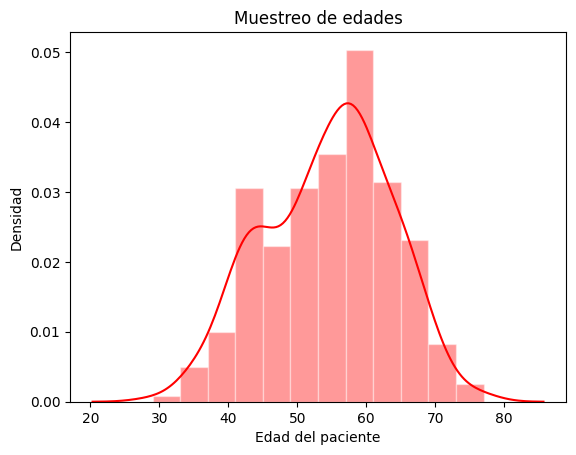

In [14]:
# Mostramos los datos por edad
edades = sns.histplot(
    data["age"],
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, .4),
    color="red"
)
edades.set(xlabel = "Edad del paciente", ylabel = "Densidad")
plt.title("Muestreo de edades")

In [15]:
# Edades mínimas, máximas y la media 
min_age = min(data["age"])
max_age = max(data["age"])
mean_age = (data["age"]).mean()
print(f"Edad mínima  age: {min_age}")
print(f"Edad máxima: {max_age}")
print(f"Edad media: {mean_age:.4}")

Edad mínima  age: 29
Edad máxima: 77
Edad media: 54.37


In [16]:
# También podemos subclasificar en rangos de edad
young_age_total = len(data[ (data.age>=29) & (data.age<40) ])
middle_age_total = len(data[ (data.age>=40) & (data.age<55) ])
elder_age_total = len(data[ (data.age>55) ])

print(f"Cantidad de personas en edad juvenil: {young_age_total}")
print(f"Cantidad de personas en edad promedio: {middle_age_total}")
print(f"Cantidad de personas adulta: {elder_age_total}") 

Cantidad de personas en edad juvenil: 16
Cantidad de personas en edad promedio: 128
Cantidad de personas adulta: 151


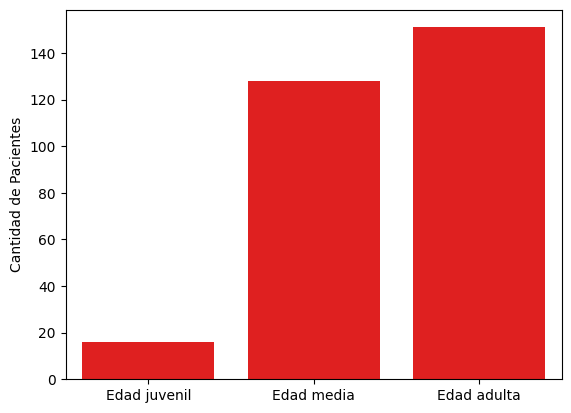

In [17]:
age_plot = sns.barplot(x = ["Edad juvenil", "Edad media", "Edad adulta"], y =[ young_age_total, middle_age_total, elder_age_total], color = "red")
age_plot.set(ylabel = "Cantidad de Pacientes")
plt.show()

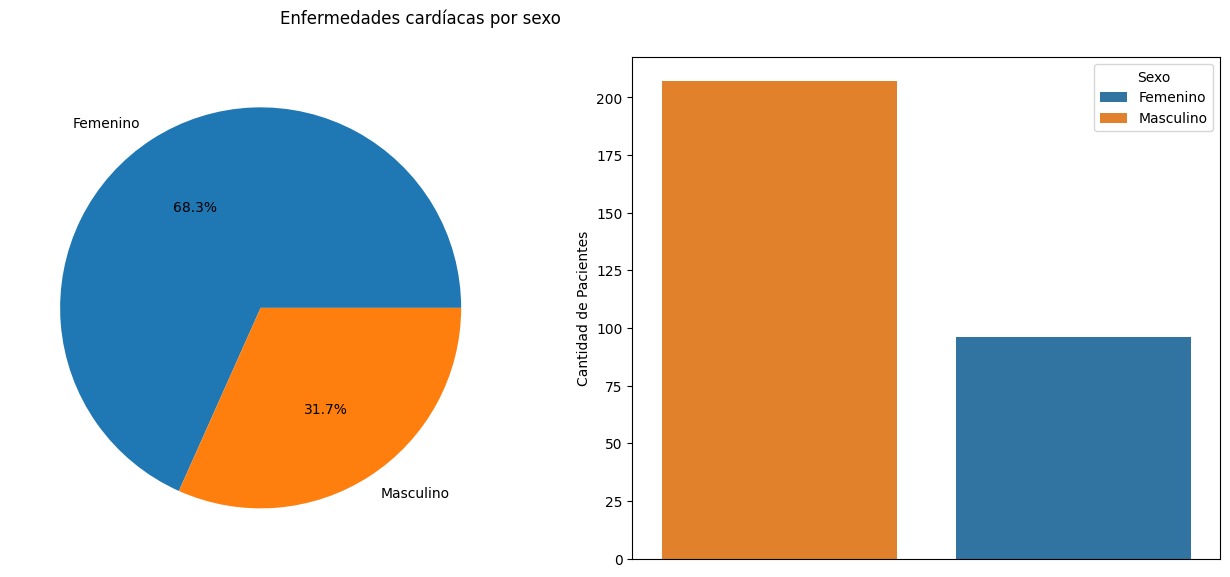

In [18]:
# Mostramos las relación entre enfermedades cardíacas y el sexo del paciente
labels = ["Femenino", "Masculino"]

# Gráfico de Torta
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
data["sex"].value_counts().plot.pie(
    ax=ax[0],
    autopct="%1.1f%%",
    labels=labels
)

# Gráfico de Barras
sns.countplot(x="sex", hue = "sex", data = data, ax = ax[1], order = data["sex"].value_counts().index)
fig.suptitle("Enfermedades cardíacas por sexo")
plt.legend(title="Sexo", loc="upper right", labels=labels)
plt.subplots_adjust(left=None, bottom=None, right=1.3, top=0.9, wspace=None, hspace=None)
plt.xlabel("Sexo")
plt.ylabel("Cantidad de Pacientes")
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
plt.show()

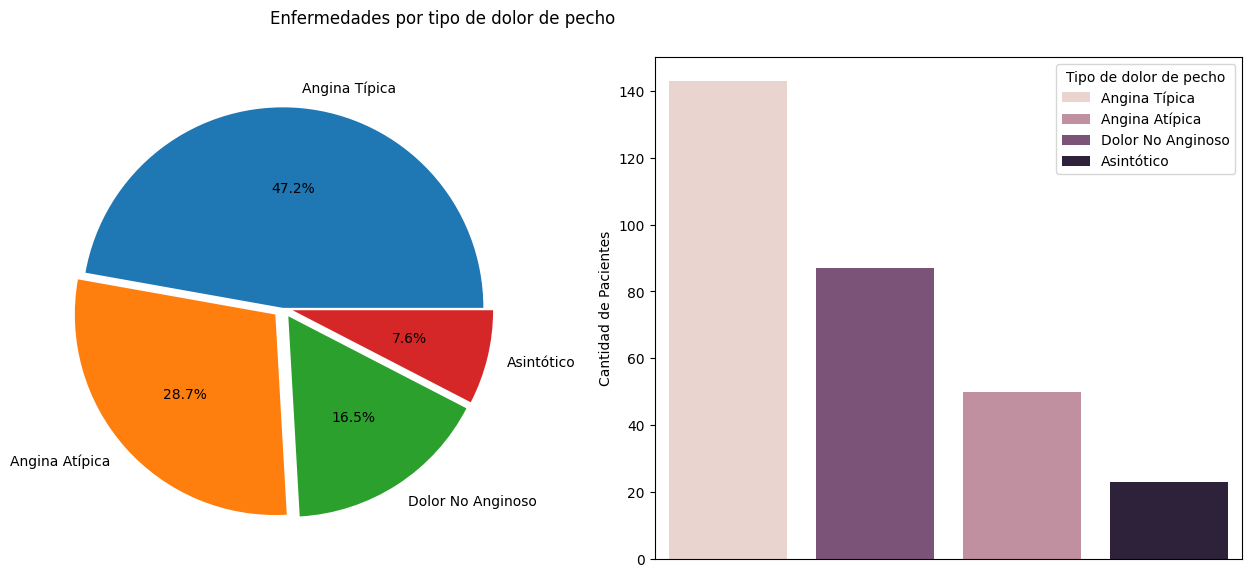

In [19]:
# Tipos de dolores de pecho
labels = [
    "Angina Típica",
    "Angina Atípica",
    "Dolor No Anginoso",
    "Asintótico",
]

#
fig , ax = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout()
data["cp"].value_counts().plot.pie(
    ax=ax[0],
    autopct="%1.1f%%",
    explode=[0, 0.05, 0.05, 0.05],
    labels=labels
)
cp_plot = sns.countplot(x="cp", hue="cp", data=data, ax=ax[1], order=data["cp"].value_counts().index)

# Gráfico de Barras
fig.suptitle("Enfermedades por tipo de dolor de pecho")
plt.legend(
    title="Tipo de dolor de pecho",
    loc="upper right",
    labels=labels
)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
plt.subplots_adjust(left=None, bottom=None, right=1.3, top=0.9, wspace=None, hspace=None)
plt.xlabel("Tipo de dolor")
plt.ylabel("Cantidad de Pacientes")
plt.show()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

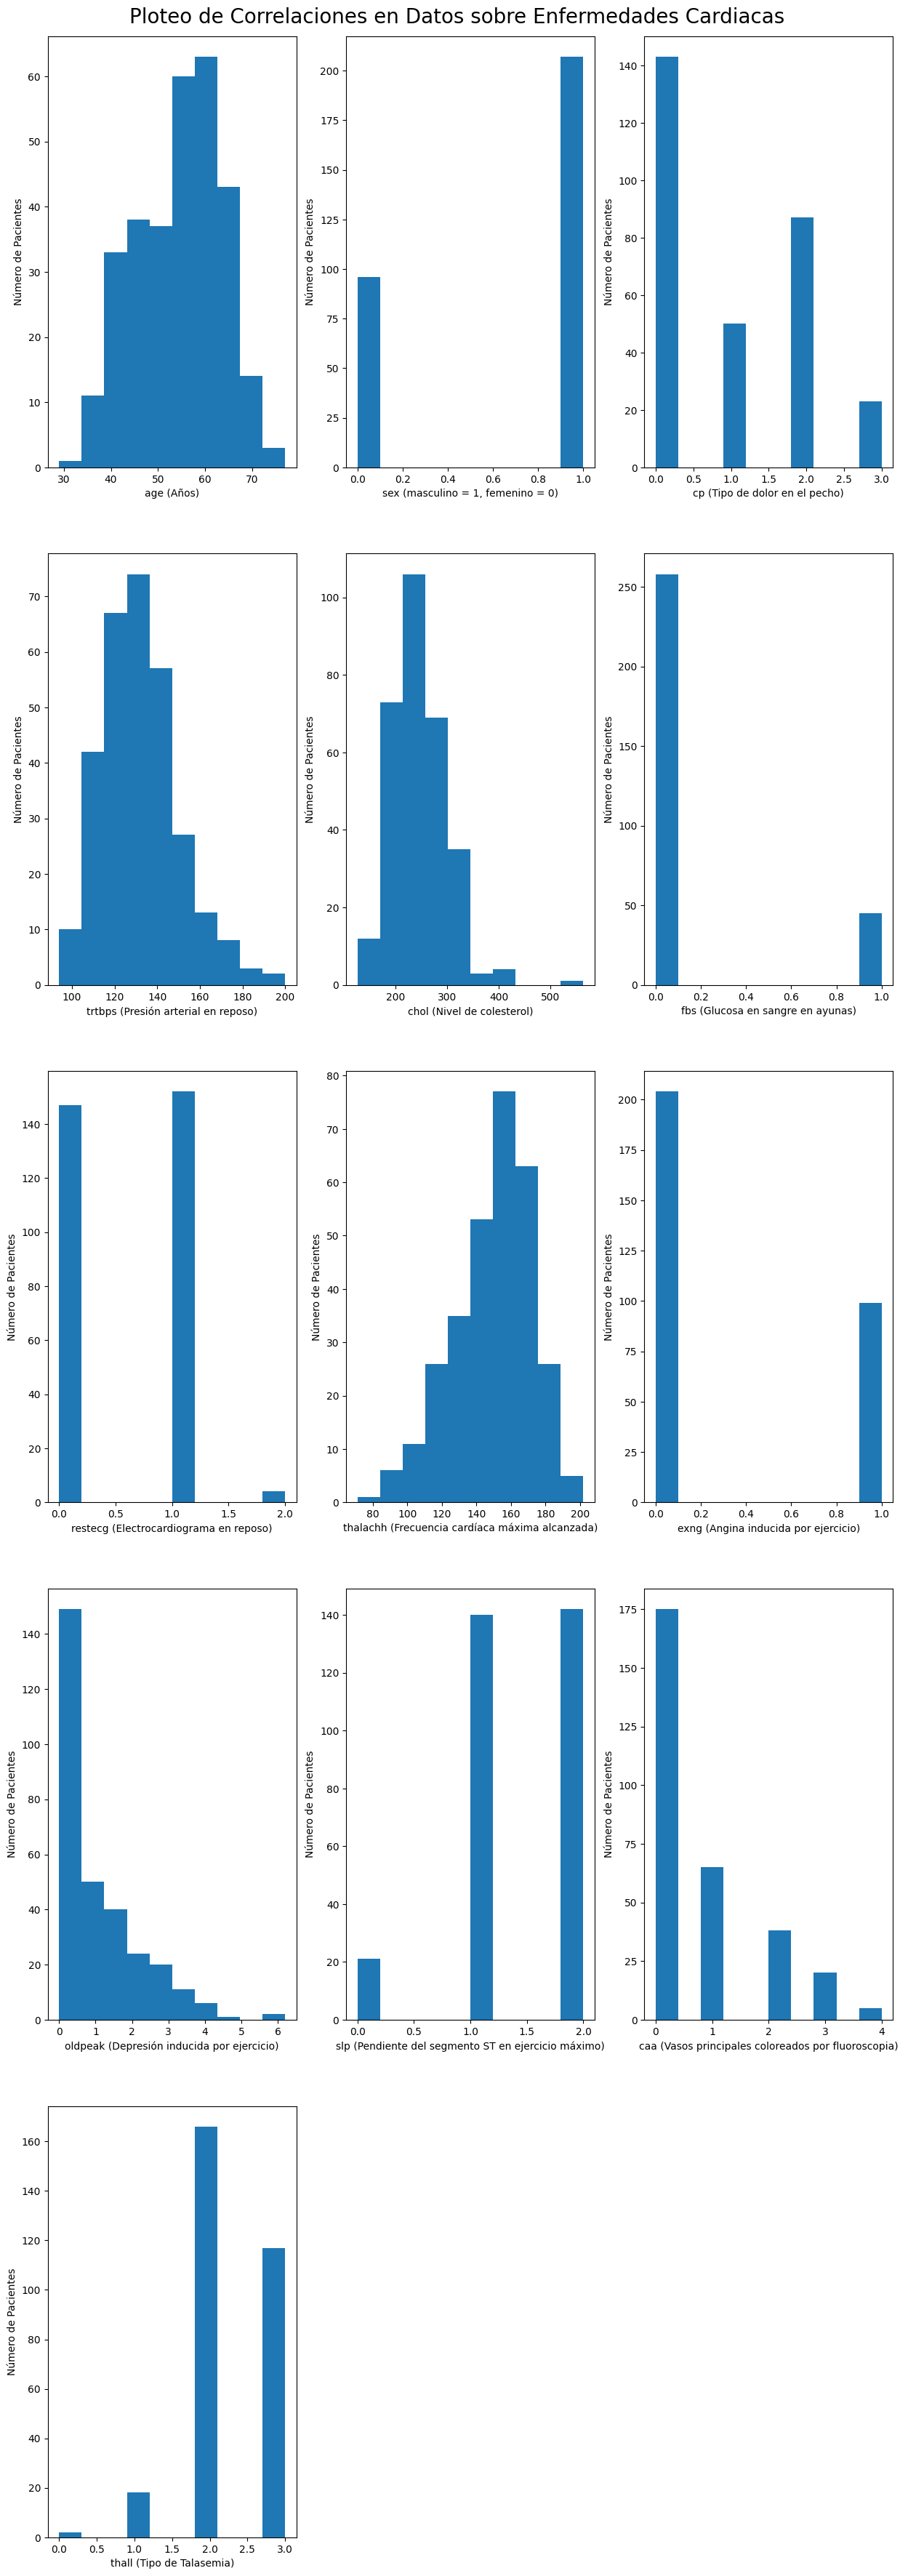

In [20]:
fig, ejes = plt.subplots(nrows=5, ncols=3, figsize=(15,40))
plt.subplots_adjust(wspace=0.20, hspace=0.20, top=0.97)
plt.suptitle("Ploteo de Correlaciones en Datos sobre Enfermedades Cardiacas", fontsize=20)

ejes[0,0].hist(data.age)
ejes[0,0].set_xlabel("age (Años)")
ejes[0,0].set_ylabel("Número de Pacientes")

ejes[0,1].hist(data.sex)
ejes[0,1].set_xlabel("sex (masculino = 1, femenino = 0)")
ejes[0,1].set_ylabel("Número de Pacientes")

ejes[0,2].hist(data.cp)
ejes[0,2].set_xlabel("cp (Tipo de dolor en el pecho)")
ejes[0,2].set_ylabel("Número de Pacientes")

ejes[1,0].hist(data.trtbps)
ejes[1,0].set_xlabel("trtbps (Presión arterial en reposo)")
ejes[1,0].set_ylabel("Número de Pacientes")

ejes[1,1].hist(data.chol)
ejes[1,1].set_xlabel("chol (Nivel de colesterol)")
ejes[1,1].set_ylabel("Número de Pacientes")

ejes[1,2].hist(data.fbs)
ejes[1,2].set_xlabel("fbs (Glucosa en sangre en ayunas)")
ejes[1,2].set_ylabel("Número de Pacientes")

ejes[2,0].hist(data.restecg)
ejes[2,0].set_xlabel("restecg (Electrocardiograma en reposo)")
ejes[2,0].set_ylabel("Número de Pacientes")

ejes[2,1].hist(data.thalachh)
ejes[2,1].set_xlabel("thalachh (Frecuencia cardíaca máxima alcanzada)")
ejes[2,1].set_ylabel("Número de Pacientes")

ejes[2,2].hist(data.exng)
ejes[2,2].set_xlabel("exng (Angina inducida por ejercicio)")
ejes[2,2].set_ylabel("Número de Pacientes")

ejes[3,0].hist(data.oldpeak)
ejes[3,0].set_xlabel("oldpeak (Depresión inducida por ejercicio)")
ejes[3,0].set_ylabel("Número de Pacientes")

ejes[3,1].hist(data.slp)
ejes[3,1].set_xlabel("slp (Pendiente del segmento ST en ejercicio máximo)")
ejes[3,1].set_ylabel("Número de Pacientes")

ejes[3,2].hist(data.caa)
ejes[3,2].set_xlabel("caa (Vasos principales coloreados por fluoroscopia)")
ejes[3,2].set_ylabel("Número de Pacientes")

ejes[4,0].hist(data.thall)
ejes[4,0].set_xlabel("thall (Tipo de Talasemia)")
ejes[4,0].set_ylabel("Número de Pacientes")

ejes[4,1].axis("off")
ejes[4,2].axis("off")


In [21]:
display_markdown("### Correlación entre características", raw=True)
corr = data.corr()
corr

### Correlación entre características

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### Por último, vemos un heatmap de correlación entre características y la presencia de enfermedad

<Axes: >

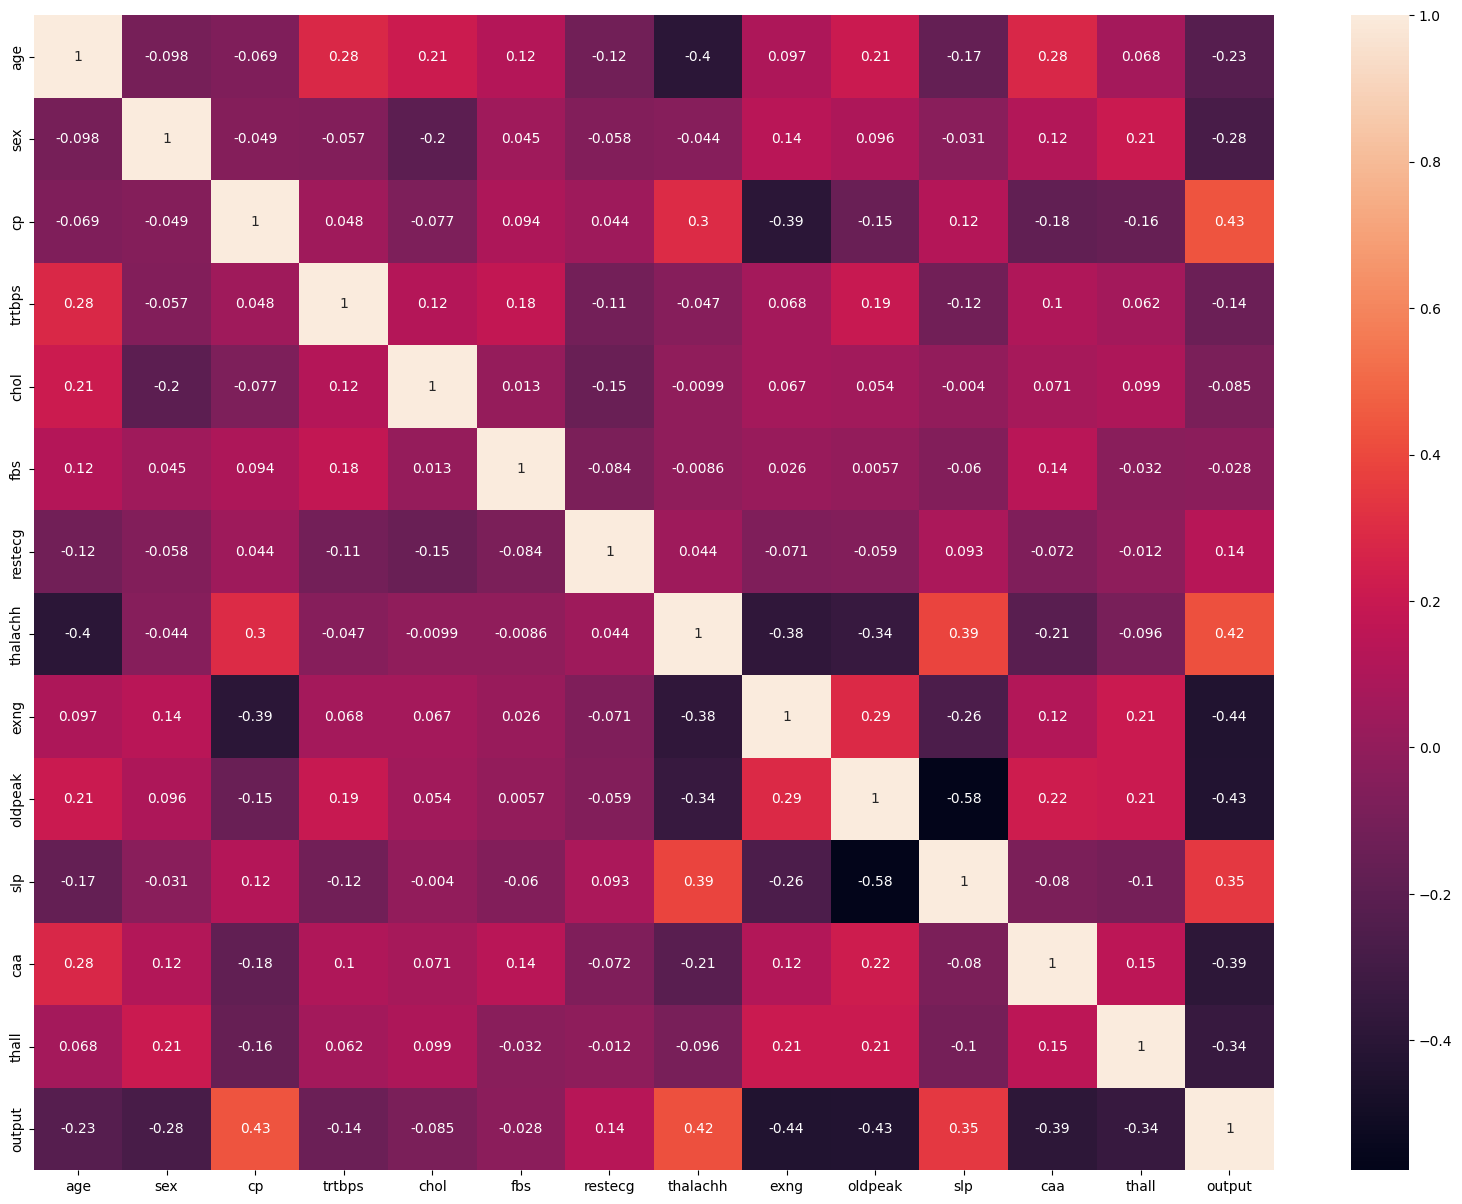

In [22]:
display_markdown("#### Por último, vemos un heatmap de correlación entre características y la presencia de enfermedad", raw=True)
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

In [23]:
display_markdown("""
Al analizar los valores positivos y negativos, podemos entender la correlación entre cómo los valores positivos y negativos afectan entre sí en una característica.

- Seleccionamos las características dependientes e independientes
- La variable objetivo (Output) es una característica dependiente
""", raw=True)

X = data.drop("output", axis=1)

# Características independientes
X


Al analizar los valores positivos y negativos, podemos entender la correlación entre cómo los valores positivos y negativos afectan entre sí en una característica.

- Seleccionamos las características dependientes e independientes
- La variable objetivo (Output) es una característica dependiente


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
# Característica dependiente (Output)
y = data["output"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [25]:
display_markdown("### Entrenamiento con RandomForest", raw=True)

### Entrenamiento con RandomForest

In [26]:
# Ahora tenemos que crear tanto los datos de entrenamiento como las características independientes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# El modelo que hemos importado es: Random Forest. Usaremos 100 árboles para la estimación.
random_forest = RandomForestClassifier(n_estimators=100)

# Ajustamos el modelo con los parámetros de entrenamiento que creamos
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

1.0

In [27]:
display_markdown("""
### Generamos el informe del modelo RandomForest

- Precision: La proporción de predicciones correctas entre todas las predicciones realizadas
- Recall: La proporción de verdaderos positivos entre todos los ejemplos que realmente pertenecen a la clase positiva
- F1-Score: La media armónica entre la precisión y el recall. Es una medida que combina ambos aspectos en una sola métrica
- Support: El número de ocurrencias de cada clase en los datos reales
""", raw=True)

print(classification_report(y_test, y_pred_random_forest))

display_markdown("""
#### Resultados para RandomForest
- El modelo tiene una precisión de 81% para la clase 0 (sin enfermedad) y un recall de 81%
- El modelo tiene una precisión de 85% para la clase 1 (con enfermedad) y un recall de 85%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 84%
""", raw=True)


### Generamos el informe del modelo RandomForest

- Precision: La proporción de predicciones correctas entre todas las predicciones realizadas
- Recall: La proporción de verdaderos positivos entre todos los ejemplos que realmente pertenecen a la clase positiva
- F1-Score: La media armónica entre la precisión y el recall. Es una medida que combina ambos aspectos en una sola métrica
- Support: El número de ocurrencias de cada clase en los datos reales


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61




#### Resultados para RandomForest
- El modelo tiene una precisión de 81% para la clase 0 (sin enfermedad) y un recall de 81%
- El modelo tiene una precisión de 85% para la clase 1 (con enfermedad) y un recall de 85%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 84%



### Generamos la matriz de confusión para RandomForest

Una matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas clasificadas por clase:

- **Verdaderos positivos (TP)**: Casos correctamente clasificados como positivos.
- **Falsos positivos (FP)**: Casos incorrectamente clasificados como positivos.
- **Falsos negativos (FN)**: Casos incorrectamente clasificados como negativos.
- **Verdaderos negativos (TN)**: Casos correctamente clasificados como negativos.


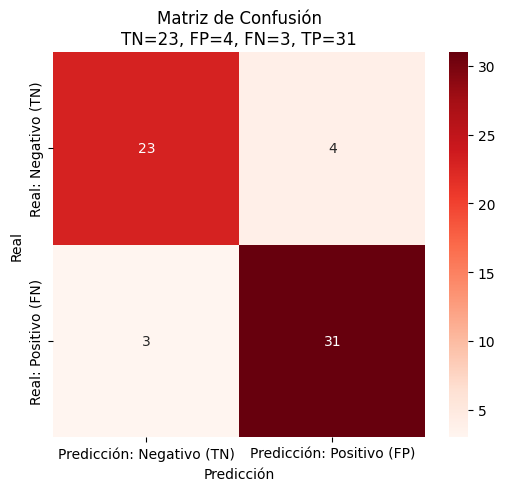

In [28]:
display_markdown("""
### Generamos la matriz de confusión para RandomForest

Una matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas clasificadas por clase:

- **Verdaderos positivos (TP)**: Casos correctamente clasificados como positivos.
- **Falsos positivos (FP)**: Casos incorrectamente clasificados como positivos.
- **Falsos negativos (FN)**: Casos incorrectamente clasificados como negativos.
- **Verdaderos negativos (TN)**: Casos correctamente clasificados como negativos.
""", raw=True)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_random_forest)

# Extraer los valores de la matriz de confusión para TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()

# Crear un mapa de calor para mostrar la matriz de confusión con las etiquetas TP, FP, FN, TN
plt.figure(figsize=(6, 5))  # Tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", 
            xticklabels=["Predicción: Negativo (TN)", "Predicción: Positivo (FP)"], 
            yticklabels=["Real: Negativo (TN)", "Real: Positivo (FN)"])

# Añadir etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

plt.show()

In [29]:
display_markdown("""
### Entrenamiento con KNN

- Precision: La proporción de predicciones correctas entre todas las predicciones realizadas
- Recall: La proporción de verdaderos positivos entre todos los ejemplos que realmente pertenecen a la clase positiva
- F1-Score: La media armónica entre la precisión y el recall. Es una medida que combina ambos aspectos en una sola métrica
- Support: El número de ocurrencias de cada clase en los datos reales
""", raw=True)


### Entrenamiento con KNN

- Precision: La proporción de predicciones correctas entre todas las predicciones realizadas
- Recall: La proporción de verdaderos positivos entre todos los ejemplos que realmente pertenecen a la clase positiva
- F1-Score: La media armónica entre la precisión y el recall. Es una medida que combina ambos aspectos en una sola métrica
- Support: El número de ocurrencias de cada clase en los datos reales


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo con k = 5. O sea basándonos en las 5 observaciones más cercanas en el conjunto de entrenamiento
knn = KNeighborsClassifier(n_neighbors=5)

# La función fit() ajusta el modelo a los datos de entrenamiento (X_train para las características y y_train para las etiquetas o clases).
knn.fit(X_train, y_train)

# La función predict() realiza las predicciones del modelo utilizando los datos de prueba (X_test).
# El modelo asigna una etiqueta de clase a cada ejemplo del conjunto de prueba, basándose en la proximidad de sus vecinos más cercanos en el conjunto de entrenamiento.
knnpredict = knn.predict(X_test)

display_markdown("""
### Generamos el informe del modelo K-Nearest Neighbors (KNN)

- Precision: La proporción de predicciones correctas entre todas las predicciones realizadas
- Recall: La proporción de verdaderos positivos entre todos los ejemplos que realmente pertenecen a la clase positiva
- F1-Score: La media armónica entre la precisión y el recall. Es una medida que combina ambos aspectos en una sola métrica
- Support: El número de ocurrencias de cada clase en los datos reales
""", raw=True)
print(classification_report(y_test, knnpredict))

display_markdown("""
#### Resultados para KNN
- El modelo tiene una precisión de 59% para la clase 0 (sin enfermedad) y un recall de 63%
- El modelo tiene una precisión de 69% para la clase 1 (con enfermedad) y un recall de 65%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 64%
""", raw=True)


### Generamos el informe del modelo K-Nearest Neighbors (KNN)

- Precision: La proporción de predicciones correctas entre todas las predicciones realizadas
- Recall: La proporción de verdaderos positivos entre todos los ejemplos que realmente pertenecen a la clase positiva
- F1-Score: La media armónica entre la precisión y el recall. Es una medida que combina ambos aspectos en una sola métrica
- Support: El número de ocurrencias de cada clase en los datos reales


              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61




#### Resultados para KNN
- El modelo tiene una precisión de 59% para la clase 0 (sin enfermedad) y un recall de 63%
- El modelo tiene una precisión de 69% para la clase 1 (con enfermedad) y un recall de 65%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 64%



### Generamos la matriz de confusión

Una matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas clasificadas por clase:

- **Verdaderos positivos (TP)**: Casos correctamente clasificados como positivos.
- **Falsos positivos (FP)**: Casos incorrectamente clasificados como positivos.
- **Falsos negativos (FN)**: Casos incorrectamente clasificados como negativos.
- **Verdaderos negativos (TN)**: Casos correctamente clasificados como negativos.


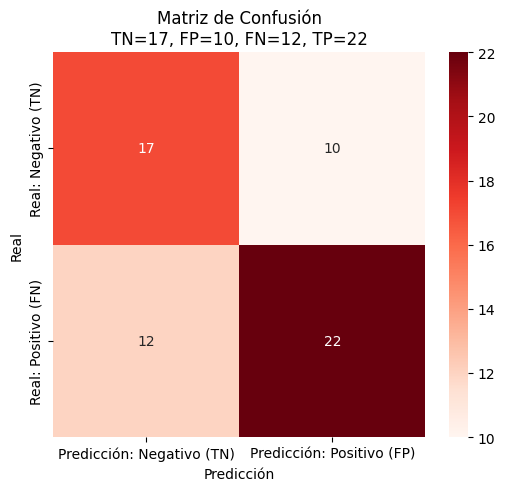

In [31]:
display_markdown("""
### Generamos la matriz de confusión

Una matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas clasificadas por clase:

- **Verdaderos positivos (TP)**: Casos correctamente clasificados como positivos.
- **Falsos positivos (FP)**: Casos incorrectamente clasificados como positivos.
- **Falsos negativos (FN)**: Casos incorrectamente clasificados como negativos.
- **Verdaderos negativos (TN)**: Casos correctamente clasificados como negativos.
""", raw=True)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, knnpredict)

# Extraer los valores de la matriz de confusión para TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()

# Crear un mapa de calor para mostrar la matriz de confusión con las etiquetas TP, FP, FN, TN
plt.figure(figsize=(6, 5))  # Tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", 
            xticklabels=["Predicción: Negativo (TN)", "Predicción: Positivo (FP)"], 
            yticklabels=["Real: Negativo (TN)", "Real: Positivo (FN)"])

# Añadir etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

plt.show()

In [32]:
display_markdown("### Entrenamiento con Regresión Logística", raw=True)

### Entrenamiento con Regresión Logística

In [33]:
# penalty: L2 es una regularización de tipo `Ridge`, que penaliza los coeficientes grandes para evitar sobreajuste.
# dual: Este parámetro indica que no se utilizará la formulación dual para la optimización. Se usa True solo cuando se trabaja con problemas de clasificación muy grandes.
# C: Es el parámetro de regularización que controla la magnitud de la penalización. Un valor más bajo indica una regularización más fuerte. Un valor de 1.0 es un valor estándar que no implica una regularización extremadamente fuerte.
model = LogisticRegression(fit_intercept=True, penalty='l2', dual=False, C=1.0)
model.fit(X_train, y_train)
modelpredict = model.predict(X_test)

# Utilizamos los mismos reportes anteriormente vistos
print(classification_report(y_test, modelpredict))
display_markdown("""
#### Resultados para Regresión Logística
- El modelo tiene una precisión de 85% para la clase 0 (sin enfermedad) y un recall de 81%
- El modelo tiene una precisión de 86% para la clase 1 (con enfermedad) y un recall de 88%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 85%
""", raw=True)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



#### Resultados para Regresión Logística
- El modelo tiene una precisión de 85% para la clase 0 (sin enfermedad) y un recall de 81%
- El modelo tiene una precisión de 86% para la clase 1 (con enfermedad) y un recall de 88%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 85%


### Generamos la matriz de confusión para regresión logística

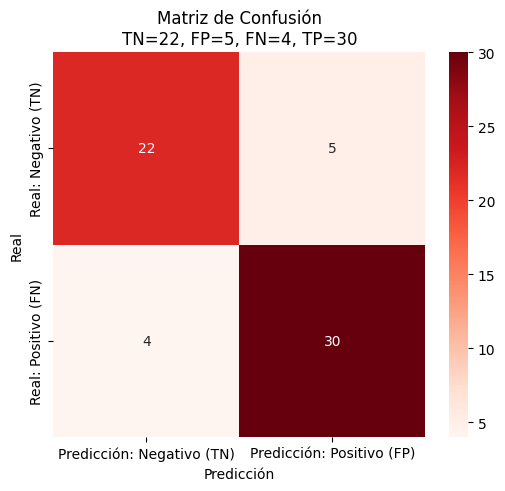

In [34]:
display_markdown("### Generamos la matriz de confusión para regresión logística", raw=True)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, modelpredict)

# Extraer los valores de la matriz de confusión para TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()

# Crear un mapa de calor para mostrar la matriz de confusión con las etiquetas TP, FP, FN, TN
plt.figure(figsize=(6, 5))  # Tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", 
            xticklabels=["Predicción: Negativo (TN)", "Predicción: Positivo (FP)"], 
            yticklabels=["Real: Negativo (TN)", "Real: Positivo (FN)"])

# Añadir etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

plt.show()

In [35]:
display_markdown("""
## Primera Conclusión

El modelo de **Random Forest** ha mostrado el mejor rendimiento, con una precisión, recall y F1-score más altos en comparación con KNN y Regresión Logística.

En particular, Random Forest tiene una mayor capacidad para predecir ambas clases (sin enfermedad y con enfermedad) con una precisión global del 87%, mientras que KNN tiene un rendimiento notablemente más bajo (64%).
Regresión Logística se encuentra en un punto intermedio, con un 85% de precisión, lo que la hace una opción competitiva, pero aún por debajo de Random Forest.
""", raw=True)


## Primera Conclusión

El modelo de **Random Forest** ha mostrado el mejor rendimiento, con una precisión, recall y F1-score más altos en comparación con KNN y Regresión Logística.

En particular, Random Forest tiene una mayor capacidad para predecir ambas clases (sin enfermedad y con enfermedad) con una precisión global del 87%, mientras que KNN tiene un rendimiento notablemente más bajo (64%).
Regresión Logística se encuentra en un punto intermedio, con un 85% de precisión, lo que la hace una opción competitiva, pero aún por debajo de Random Forest.


In [36]:
display_markdown("""
## Paso 1: Optimizando nuestro modelo (RandomForest)

### Optimización de Hiperparámetros

En Random Forest, los parámetros clave que podemos ajustar son:
- **n_estimators**: Número de árboles en el bosque. Aunque 100 es un valor estándar, vamos a probar con valores mayores (por ejemplo, 200, 300) para ver si mejora la precisión. Sin embargo, más árboles normalmente pueden aumentar el tiempo de cómputo.
- **max_depth**: La profundidad máxima de los árboles. Si los árboles son demasiado profundos, pueden sobreajustar los datos. Limitar la profundidad de los árboles puede ayudar a generalizar mejor.
- **min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo. Aumentar este valor puede hacer que los árboles sean más simples y evitar el sobreajuste.
- **min_samples_leaf**: El número mínimo de muestras necesarias para estar en una hoja. Aumentarlo puede hacer que el modelo sea más robusto y menos susceptible a las fluctuaciones menores de los datos.
- **max_features**: El número máximo de características que se consideran para dividir cada nodo. Podemos probar con **sqrt** o **log2**, que son valores comunes y pueden mejorar el rendimiento al reducir la correlación entre los árboles.
- **bootstrap**: Si se utiliza muestreo con reemplazo para la construcción de los árboles. Normalmente se establece en True, pero es interesante probarlo con False para ver si mejora la generalización.

### Métodos para optimizar

Podemos usar Busqueda de Cuadricula (GridSearch) o Busqueda Aleatoria (RandomizedSearch) para realizar una búsqueda en el espacio de los hiperparámetros y encontrar la mejor combinación.
""", raw=True)


## Paso 1: Optimizando nuestro modelo (RandomForest)

### Optimización de Hiperparámetros

En Random Forest, los parámetros clave que podemos ajustar son:
- **n_estimators**: Número de árboles en el bosque. Aunque 100 es un valor estándar, vamos a probar con valores mayores (por ejemplo, 200, 300) para ver si mejora la precisión. Sin embargo, más árboles normalmente pueden aumentar el tiempo de cómputo.
- **max_depth**: La profundidad máxima de los árboles. Si los árboles son demasiado profundos, pueden sobreajustar los datos. Limitar la profundidad de los árboles puede ayudar a generalizar mejor.
- **min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo. Aumentar este valor puede hacer que los árboles sean más simples y evitar el sobreajuste.
- **min_samples_leaf**: El número mínimo de muestras necesarias para estar en una hoja. Aumentarlo puede hacer que el modelo sea más robusto y menos susceptible a las fluctuaciones menores de los datos.
- **max_features**: El número máximo de características que se consideran para dividir cada nodo. Podemos probar con **sqrt** o **log2**, que son valores comunes y pueden mejorar el rendimiento al reducir la correlación entre los árboles.
- **bootstrap**: Si se utiliza muestreo con reemplazo para la construcción de los árboles. Normalmente se establece en True, pero es interesante probarlo con False para ver si mejora la generalización.

### Métodos para optimizar

Podemos usar Busqueda de Cuadricula (GridSearch) o Busqueda Aleatoria (RandomizedSearch) para realizar una búsqueda en el espacio de los hiperparámetros y encontrar la mejor combinación.


In [37]:
display_markdown("### Optimizando usando Busqueda de Cuadricula", raw=True)

# Definimos el espacio de búsqueda para los hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],           # Número de árboles
    'max_depth': [None, 10, 20, 30],           # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],             # Mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar
    'bootstrap': [True, False]                 # Si se utiliza muestreo con reemplazo
}

# Recreamos el modelo base
random_forest = RandomForestClassifier(random_state=0)

# Configuramos GridSearchCV con validación cruzada de 5
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Ajustamos el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

### Optimizando usando Busqueda de Cuadricula

/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
358 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/gattes/Documents/repos/github/viu-63g

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [38]:
display_markdown("### Mejores parámetros encontrados con Busqueda de Cuadricula:", raw=True)
pprint(grid_search.best_params_)

# Evaluamos el modelo en el conjunto de test
best_rf = grid_search.best_estimator_
y_pred_grid_search = best_rf.predict(X_test)

accuracy = best_rf.score(X_test, y_test)
display_markdown(f"### Precisión del mejor modelo en el conjunto de prueba: {accuracy:.4f}", raw=True)

### Mejores parámetros encontrados con Busqueda de Cuadricula:

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}


### Precisión del mejor modelo en el conjunto de prueba: 0.8197


### Informe del modelo RandomForest luego de la optimización con Búsqueda de Cuadricula


              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61




#### Resultados para RandomForest
- El modelo tiene una precisión de 83% para la clase 0 (sin enfermedad) y un recall de 74%
- El modelo tiene una precisión de 81% para la clase 1 (con enfermedad) y un recall de 88%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 82%



### Ahora la matriz de confusión del modelo luego de la optimización con Búsqueda de Cuadricula


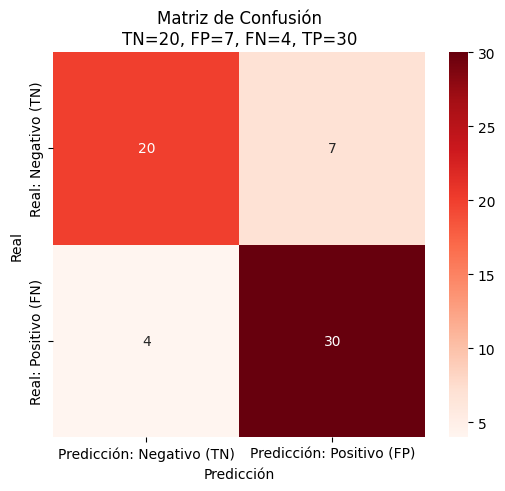

In [39]:
display_markdown("""
### Informe del modelo RandomForest luego de la optimización con Búsqueda de Cuadricula
""", raw=True)

print(classification_report(y_test, y_pred_grid_search))

display_markdown("""
#### Resultados para RandomForest
- El modelo tiene una precisión de 83% para la clase 0 (sin enfermedad) y un recall de 74%
- El modelo tiene una precisión de 81% para la clase 1 (con enfermedad) y un recall de 88%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 82%
""", raw=True)

display_markdown("""
### Ahora la matriz de confusión del modelo luego de la optimización con Búsqueda de Cuadricula
""", raw=True)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_grid_search)

# Extraer los valores de la matriz de confusión para TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()

# Crear un mapa de calor para mostrar la matriz de confusión con las etiquetas TP, FP, FN, TN
plt.figure(figsize=(6, 5))  # Tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Predicción: Negativo (TN)", "Predicción: Positivo (FP)"],
            yticklabels=["Real: Negativo (TN)", "Real: Positivo (FN)"])

# Añadir etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

plt.show()

In [40]:
display_markdown("""
### Optimizando usando Busqueda Aleatoria

Si el espacio de hiperparámetros es muy grande, podemos realizar una búsqueda más rápida pero aún efectiva usando Busqueda Aleatoria.

Este método selecciona aleatoriamente combinaciones de hiperparámetros y prueba un número fijo de iteraciones. Esto puede ser útil cuando tenemos una gran cantidad de parámetros.
""", raw=True)


### Optimizando usando Busqueda Aleatoria

Si el espacio de hiperparámetros es muy grande, podemos realizar una búsqueda más rápida pero aún efectiva usando Busqueda Aleatoria.

Este método selecciona aleatoriamente combinaciones de hiperparámetros y prueba un número fijo de iteraciones. Esto puede ser útil cuando tenemos una gran cantidad de parámetros.


In [41]:
# Definir el espacio de búsqueda para los hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Recreamos el modelo base
random_forest = RandomForestClassifier(random_state=0)

# Configuramos RandomizedSearchCV con validación cruzada de 5
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=0, random_state=0)

# Ajustamos el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
170 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gattes/Documents/repos/github/viu-63giin-uc2/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/gattes/Documents/repos/github/viu-63gii

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [42]:
# Mostramos los mejores parámetros encontrados
display_markdown("### Mejores parámetros encontrados con Busqueda Aleatoria", raw=True)
pprint(random_search.best_params_)

# Evaluamos el modelo en el conjunto de test
best_rf = random_search.best_estimator_
y_pred_random_search = best_rf.predict(X_test)

accuracy = best_rf.score(X_test, y_test)
display_markdown(f"### Precisión del mejor modelo en el conjunto de prueba: {accuracy:.4f}", raw=True)

### Mejores parámetros encontrados con Busqueda Aleatoria

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 400}


### Precisión del mejor modelo en el conjunto de prueba: 0.8525


### Informe del modelo RandomForest luego de la optimización con Búsqueda Aleatoria


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




#### Resultados para RandomForest
- El modelo tiene una precisión de 85% para la clase 0 (sin enfermedad) y un recall de 81%
- El modelo tiene una precisión de 86% para la clase 1 (con enfermedad) y un recall de 88%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 85%



### Ahora la matriz de confusión del modelo luego de la optimización con Búsqueda Aleatoria


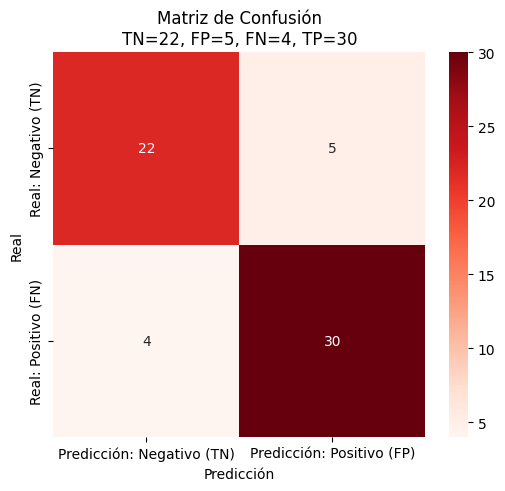

In [43]:
display_markdown("""
### Informe del modelo RandomForest luego de la optimización con Búsqueda Aleatoria
""", raw=True)

print(classification_report(y_test, y_pred_random_search))

display_markdown("""
#### Resultados para RandomForest
- El modelo tiene una precisión de 85% para la clase 0 (sin enfermedad) y un recall de 81%
- El modelo tiene una precisión de 86% para la clase 1 (con enfermedad) y un recall de 88%
- Finalmente entre lo más relevante, vemos que tenemos un accuracy (exactitud) de 85%
""", raw=True)

display_markdown("""
### Ahora la matriz de confusión del modelo luego de la optimización con Búsqueda Aleatoria
""", raw=True)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_random_search)

# Extraer los valores de la matriz de confusión para TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()

# Crear un mapa de calor para mostrar la matriz de confusión con las etiquetas TP, FP, FN, TN
plt.figure(figsize=(6, 5))  # Tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Predicción: Negativo (TN)", "Predicción: Positivo (FP)"],
            yticklabels=["Real: Negativo (TN)", "Real: Positivo (FN)"])

# Añadir etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

plt.show()

In [44]:
display_markdown("""
## Comparación de resultados post-optimización

La optimización con RandomizedSearch proporcionó la mejor mejora en comparación con el modelo original y la optimización por GridSearch. Mientras que el GridSearch introdujo un sesgo hacia la clase 1 (con enfermedad), sacrificando el rendimiento en la clase 0 (sin enfermedad), RandomizedSearch logró un equilibrio entre ambas clases, mejorando tanto la precisión como el recall, lo que resultó en una mayor precisión global.

Este ejercicio demuestra la importancia de una optimización bien equilibrada para mejorar el rendimiento del modelo, sin comprometer demasiado la detección de alguna de las clases. 

### Pero, por qué pueden mejorar o empeorar los resultados?

Como hemos visto, es posible que los resultados mejoren o empeoren después de aplicar optimizaciones como la búsqueda de cuadrícula o la búsqueda aleatoria, y existen varias razones por las cuales esto puede ocurrir:

- **Sobreajuste (Overfitting)**: Cuando optimizamos un modelo, especialmente con técnicas como la búsqueda de cuadrícula, el modelo puede terminar ajustándose demasiado a los datos de entrenamiento, lo que reduce su capacidad para generalizar a datos nuevos (el conjunto de prueba).
- **Búsqueda demasiado exhaustiva o parámetros no adecuados**: Si durante la optimización el rango de parámetros seleccionados no es el adecuado para el modelo o el conjunto de datos, el proceso de optimización podría conducir a configuraciones subóptimas.
- **Evaluación incorrecta durante la optimización**: Dependiendo de cómo se evalúe el modelo durante el proceso de optimización, el rendimiento podría verse afectado por un error en la estrategia de validación o en la evaluación de los parámetros.
- **Hiperparámetros mal sintonizados**: Algunos hiperparámetros pueden ser más sensibles que otros, y pequeños ajustes en estos pueden llevar a un rendimiento mucho peor.
- **Métrica de optimización inadecuada**: Si el proceso de optimización se centra en una métrica que no refleja bien los objetivos del problema, los resultados pueden empeorar
""", raw=True)


## Comparación de resultados post-optimización

La optimización con RandomizedSearch proporcionó la mejor mejora en comparación con el modelo original y la optimización por GridSearch. Mientras que el GridSearch introdujo un sesgo hacia la clase 1 (con enfermedad), sacrificando el rendimiento en la clase 0 (sin enfermedad), RandomizedSearch logró un equilibrio entre ambas clases, mejorando tanto la precisión como el recall, lo que resultó en una mayor precisión global.

Este ejercicio demuestra la importancia de una optimización bien equilibrada para mejorar el rendimiento del modelo, sin comprometer demasiado la detección de alguna de las clases. 

### Pero, por qué pueden mejorar o empeorar los resultados?

Como hemos visto, es posible que los resultados mejoren o empeoren después de aplicar optimizaciones como la búsqueda de cuadrícula o la búsqueda aleatoria, y existen varias razones por las cuales esto puede ocurrir:

- **Sobreajuste (Overfitting)**: Cuando optimizamos un modelo, especialmente con técnicas como la búsqueda de cuadrícula, el modelo puede terminar ajustándose demasiado a los datos de entrenamiento, lo que reduce su capacidad para generalizar a datos nuevos (el conjunto de prueba).
- **Búsqueda demasiado exhaustiva o parámetros no adecuados**: Si durante la optimización el rango de parámetros seleccionados no es el adecuado para el modelo o el conjunto de datos, el proceso de optimización podría conducir a configuraciones subóptimas.
- **Evaluación incorrecta durante la optimización**: Dependiendo de cómo se evalúe el modelo durante el proceso de optimización, el rendimiento podría verse afectado por un error en la estrategia de validación o en la evaluación de los parámetros.
- **Hiperparámetros mal sintonizados**: Algunos hiperparámetros pueden ser más sensibles que otros, y pequeños ajustes en estos pueden llevar a un rendimiento mucho peor.
- **Métrica de optimización inadecuada**: Si el proceso de optimización se centra en una métrica que no refleja bien los objetivos del problema, los resultados pueden empeorar


In [45]:
display_markdown("""
### Conclusión

- Al comparar los tres modelos (RandomForest, KNN y Regresión Lineal), el original Random Forest es claramente el más fuerte, con una accuracy de 89% y un F1-score alto para ambas clases.
- Comparado con los otros modelos, como KNN y Regresión Logística, que tuvieron resultados inferiores en cuanto a precision y recall, Random Forest sigue siendo el modelo más robusto.
- KNN presentó una accuracy de 64% y Regresión Logística de 85%, lo que demuestra que, en este caso, Random Forest proporciona el mejor equilibrio entre precisión y recall.

### Reflexión final y aprendizajes

Finalmente y para coronar esta actividad, experimentamos con técnicas de optimización de hiperparámetros para mejorar el rendimiento:

- Aunque Random Forest mostró un rendimiento inicial sólido, las optimizaciones (búsqueda de cuadrícula y aleatoria) en ocasiones empeoraron los resultados debido a problemas de sobreajuste o una selección subóptima de parámetros, como es el caso de busqueda por cuadrícula.
- En el caso de Búsqueda Aleatoria y tal como hemos visto, se mostró una mejora (aunque no sustancial) respecto del modelo inicial.
- Esto subraya la importancia de realizar una optimización cuidadosa y no asumir que cualquier mejora en los hiperparámetros llevará automáticamente a un mejor rendimiento en el conjunto de prueba.
- El **aprendizaje clave** es que, aunque la optimización puede mejorar ciertos aspectos del modelo, es fundamental evaluar el impacto de los cambios de manera crítica, utilizando métricas adecuadas que se alineen con los objetivos del problema.
  - Además, cada modelo tiene sus fortalezas y limitaciones, y la clave para obtener buenos resultados no solo radica en elegir el modelo correcto, sino también en entender cómo afinar sus parámetros para equilibrar el ajuste y la generalización.
""", raw=True)


### Conclusión

- Al comparar los tres modelos (RandomForest, KNN y Regresión Lineal), el original Random Forest es claramente el más fuerte, con una accuracy de 89% y un F1-score alto para ambas clases.
- Comparado con los otros modelos, como KNN y Regresión Logística, que tuvieron resultados inferiores en cuanto a precision y recall, Random Forest sigue siendo el modelo más robusto.
- KNN presentó una accuracy de 64% y Regresión Logística de 85%, lo que demuestra que, en este caso, Random Forest proporciona el mejor equilibrio entre precisión y recall.

### Reflexión final y aprendizajes

Finalmente y para coronar esta actividad, experimentamos con técnicas de optimización de hiperparámetros para mejorar el rendimiento:

- Aunque Random Forest mostró un rendimiento inicial sólido, las optimizaciones (búsqueda de cuadrícula y aleatoria) en ocasiones empeoraron los resultados debido a problemas de sobreajuste o una selección subóptima de parámetros, como es el caso de busqueda por cuadrícula.
- En el caso de Búsqueda Aleatoria y tal como hemos visto, se mostró una mejora (aunque no sustancial) respecto del modelo inicial.
- Esto subraya la importancia de realizar una optimización cuidadosa y no asumir que cualquier mejora en los hiperparámetros llevará automáticamente a un mejor rendimiento en el conjunto de prueba.
- El **aprendizaje clave** es que, aunque la optimización puede mejorar ciertos aspectos del modelo, es fundamental evaluar el impacto de los cambios de manera crítica, utilizando métricas adecuadas que se alineen con los objetivos del problema.
  - Además, cada modelo tiene sus fortalezas y limitaciones, y la clave para obtener buenos resultados no solo radica en elegir el modelo correcto, sino también en entender cómo afinar sus parámetros para equilibrar el ajuste y la generalización.
